## **Predicción del clima en Llanes, Asturias.**

**Contexto**: Formo parte de un equipo de IA, nos contactan desde la AEMET porque necesitan ayuda para predecir el tiempo en Llanes, Asturias.

# 1. PROCESAMIENTO DE LA INFORMACIÓN.

Extraemos de Aemet los datos climatológicos, desde el 1 de enero de 2021 hasta el 1 de marzo de 2023, de la villa de Llanes en Asturias.

In [65]:
from datetime import datetime, timedelta
import time
from collections import namedtuple
import pandas as pd
import requests
import matplotlib.pyplot as plt

df= pd.read_json("/content/asturiasllanes.json")
df


,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,2021-01-01,1183X,LLANES,ASTURIAS,10,"7,3","8,2","5,4",15:30,"9,2",23:10,30.0,"4,2","18,3",14:40,"0,3","1013,9",24,"1008,0",10
1,2021-01-02,1183X,LLANES,ASTURIAS,10,"6,8","9,0","4,5",06:50,"9,2",13:30,25.0,"2,5","9,2",10:00,"1,1","1017,8",12,"1013,7",01
2,2021-01-03,1183X,LLANES,ASTURIAS,10,"6,2","22,0","4,5",21:20,"8,0",10:20,27.0,"3,6","12,2",11:00,"0,2","1016,9",00,"1010,2",24
3,2021-01-04,1183X,LLANES,ASTURIAS,10,"5,0","14,2","4,1",19:20,"6,0",01:00,26.0,"3,6","11,1",01:50,"0,0","1012,5",23,"1009,2",05
4,2021-01-05,1183X,LLANES,ASTURIAS,10,"7,2","8,0","4,6",00:10,"9,8",14:30,2.0,"2,8","8,6",21:00,"0,4","1013,3",Varias,"1010,6",Varias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2023-02-25,1183X,LLANES,ASTURIAS,10,"9,4","5,0","7,4",06:00,"11,3",10:40,6.0,"1,9","10,3",20:10,"0,5","1009,4",24,"1003,3",Varias
785,2023-02-26,1183X,LLANES,ASTURIAS,10,"9,0","0,0","7,6",05:00,"10,4",11:50,7.0,"4,4","12,2",23:59,"0,0","1019,0",Varias,"1009,4",Varias
786,2023-02-27,1183X,LLANES,ASTURIAS,10,"7,6","0,0","5,7",23:59,"9,4",11:10,8.0,"4,4","14,7",01:20,"2,6","1024,4",24,"1018,8",03
787,2023-02-28,1183X,LLANES,ASTURIAS,10,"7,9","1,0","5,7",Varias,"10,1",15:20,3.0,"2,2","10,0",22:50,"1,0","1026,6",11,"1023,8",03


**LEYENDA DE VARIABLES**

Las variables del DataFrame son las siguentes:
* altitud: altitud de la estación en m sobre el nivel del mar(m)
* tmed: temperatura media (ºC)
* prec: precipitaciones (mm (Ip = inferior a 0,1 mm) (Acum = Precipitación acumulada))
* tmin: temperatura mínima (ºC)
* horatmin: hora de la temperatura mínima
* tmax: temperatura máxima (ºC)
* horatmax: hora de la temperatura máxima
* dir: dirección de la racha máxima (decenas de grado (99 = dirección variable)(88 = sin dato))
* velmedia: velocidad media del viento (m/s)
* racha: racha máxima de viento (m/s)
* horaracha: hora de la racha máxima
* sol: insolación(horas)
* presMax: presión máxima al nivel de referencia de la estación (hPa)
* horapresmax: hora de la presión máxima (redondeada a la hora entera más próxima)
* presmin: presión mínima al nivel de referencia de la estación
* horapresmin: hora de la presión mínima (redondeada a la hora entera más próxima)

Como sabemos que nuestros datos pertenecen a Llanes, en Asturias, vamos a borrar la columna de indicativo (código con el que se identifica Llanes en Aemet),nombre y provincia. Además como hay un dato por día, utilizaremos la fecha de índice.

In [66]:
df=df.set_index('fecha').drop(['indicativo','nombre','provincia'],axis=1)

In [67]:
df

,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
fecha,,,,,,,,,,,,,,,,
2021-01-01,10,"7,3","8,2","5,4",15:30,"9,2",23:10,30.0,"4,2","18,3",14:40,"0,3","1013,9",24,"1008,0",10
2021-01-02,10,"6,8","9,0","4,5",06:50,"9,2",13:30,25.0,"2,5","9,2",10:00,"1,1","1017,8",12,"1013,7",01
2021-01-03,10,"6,2","22,0","4,5",21:20,"8,0",10:20,27.0,"3,6","12,2",11:00,"0,2","1016,9",00,"1010,2",24
2021-01-04,10,"5,0","14,2","4,1",19:20,"6,0",01:00,26.0,"3,6","11,1",01:50,"0,0","1012,5",23,"1009,2",05
2021-01-05,10,"7,2","8,0","4,6",00:10,"9,8",14:30,2.0,"2,8","8,6",21:00,"0,4","1013,3",Varias,"1010,6",Varias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-25,10,"9,4","5,0","7,4",06:00,"11,3",10:40,6.0,"1,9","10,3",20:10,"0,5","1009,4",24,"1003,3",Varias
2023-02-26,10,"9,0","0,0","7,6",05:00,"10,4",11:50,7.0,"4,4","12,2",23:59,"0,0","1019,0",Varias,"1009,4",Varias
2023-02-27,10,"7,6","0,0","5,7",23:59,"9,4",11:10,8.0,"4,4","14,7",01:20,"2,6","1024,4",24,"1018,8",03


Nuestra finalidad es predecir temperaturas. Por tanto , habrá variables que nos aporten poca (o ninguna) información. Las eliminamos para hacerlo más sencillo.

Las horas no nos influyen en el estudio, ni tampoco la altitud ya que es siempre la misma. Nos quedamos con temperatura media, máxima y mínima, precipitación,insolación , presión mínima, presión máxima y velocidad media del viento.

Creamos un DataFrame más sencillo para poner en práctica una función que nos dé el valor de esa variable entre 1 y 3 días antes.

In [68]:
tmp = df[['tmed', 'sol']].head(10)
tmp

,tmed,sol
fecha,,
2021-01-01,"7,3","0,3"
2021-01-02,"6,8","1,1"
2021-01-03,"6,2","0,2"
2021-01-04,"5,0","0,0"
2021-01-05,"7,2","0,4"
2021-01-06,"6,2","2,6"
2021-01-07,"6,2","5,0"
2021-01-08,"7,5","4,2"
2021-01-09,"5,7","0,0"


In [69]:
# Creo una nueva variable que me aporta la temperatura media del día anterior
N = 1

# Variable objetivo
feature = 'tmed'

# Número total de filas
rows = tmp.shape[0]

# Una lista que representa n-ésimas medidas previas de la variable.
# None para manetener el número de filas
nth_prior_measurements = [None]*N + [tmp[feature][i-N] for i in range(N, rows)]

# Crea la nueva columna de feature_N y la añade al DataFrame
col_name = "{}_{}".format(feature, N)
tmp[col_name] = nth_prior_measurements
tmp

,tmed,sol,tmed_1
fecha,,,
2021-01-01,"7,3","0,3",None
2021-01-02,"6,8","1,1","7,3"
2021-01-03,"6,2","0,2","6,8"
2021-01-04,"5,0","0,0","6,2"
2021-01-05,"7,2","0,4","5,0"
2021-01-06,"6,2","2,6","7,2"
2021-01-07,"6,2","5,0","6,2"
2021-01-08,"7,5","4,2","6,2"
2021-01-09,"5,7","0,0","7,5"


Creamos una función para ampliar esto a todas las variables que vamos a usar:

In [70]:
df=df.drop(['altitud','horatmin','horatmax','dir','racha','horaracha','horaPresMin','horaPresMax'],axis=1)


In [71]:
features=df.columns
features

Index(['tmed', 'prec', 'tmin', 'tmax', 'velmedia', 'sol', 'presMax',
       'presMin'],
      dtype='object')

Primero de todo vamos a cambiar la coma de los decimales por puntos, y vamos a hacer que se reconozcan como 'float' en lugar de 'object'. Esto va a ser útil para el análisis posterior.

In [72]:
for x in features:
    df[x]=df[x].str.replace(",", ".").astype(float)


In [73]:
df

,tmed,prec,tmin,tmax,velmedia,sol,presMax,presMin
fecha,,,,,,,,
2021-01-01,7.3,8.2,5.4,9.2,4.2,0.3,1013.9,1008.0
2021-01-02,6.8,9.0,4.5,9.2,2.5,1.1,1017.8,1013.7
2021-01-03,6.2,22.0,4.5,8.0,3.6,0.2,1016.9,1010.2
2021-01-04,5.0,14.2,4.1,6.0,3.6,0.0,1012.5,1009.2
2021-01-05,7.2,8.0,4.6,9.8,2.8,0.4,1013.3,1010.6
...,...,...,...,...,...,...,...,...
2023-02-25,9.4,5.0,7.4,11.3,1.9,0.5,1009.4,1003.3
2023-02-26,9.0,0.0,7.6,10.4,4.4,0.0,1019.0,1009.4
2023-02-27,7.6,0.0,5.7,9.4,4.4,2.6,1024.4,1018.8


In [74]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements
    
for feature in features:
    if feature != 'fecha':
        for N in range(1, 4):
            derive_nth_day_feature(df, feature, N)

In [75]:
df.columns

Index(['tmed', 'prec', 'tmin', 'tmax', 'velmedia', 'sol', 'presMax', 'presMin',
       'tmed_1', 'tmed_2', 'tmed_3', 'prec_1', 'prec_2', 'prec_3', 'tmin_1',
       'tmin_2', 'tmin_3', 'tmax_1', 'tmax_2', 'tmax_3', 'velmedia_1',
       'velmedia_2', 'velmedia_3', 'sol_1', 'sol_2', 'sol_3', 'presMax_1',
       'presMax_2', 'presMax_3', 'presMin_1', 'presMin_2', 'presMin_3'],
      dtype='object')

In [76]:
df


,tmed,prec,tmin,tmax,velmedia,sol,presMax,presMin,tmed_1,tmed_2,...,velmedia_3,sol_1,sol_2,sol_3,presMax_1,presMax_2,presMax_3,presMin_1,presMin_2,presMin_3
fecha,,,,,,,,,,,,,,,,,,,,,
2021-01-01,7.3,8.2,5.4,9.2,4.2,0.3,1013.9,1008.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,6.8,9.0,4.5,9.2,2.5,1.1,1017.8,1013.7,7.3,NaN,...,NaN,0.3,NaN,NaN,1013.9,NaN,NaN,1008.0,NaN,NaN
2021-01-03,6.2,22.0,4.5,8.0,3.6,0.2,1016.9,1010.2,6.8,7.3,...,NaN,1.1,0.3,NaN,1017.8,1013.9,NaN,1013.7,1008.0,NaN
2021-01-04,5.0,14.2,4.1,6.0,3.6,0.0,1012.5,1009.2,6.2,6.8,...,4.2,0.2,1.1,0.3,1016.9,1017.8,1013.9,1010.2,1013.7,1008.0
2021-01-05,7.2,8.0,4.6,9.8,2.8,0.4,1013.3,1010.6,5.0,6.2,...,2.5,0.0,0.2,1.1,1012.5,1016.9,1017.8,1009.2,1010.2,1013.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-25,9.4,5.0,7.4,11.3,1.9,0.5,1009.4,1003.3,9.1,6.8,...,4.2,5.5,0.0,0.0,1011.1,1017.8,1018.8,1005.2,1011.0,1016.3
2023-02-26,9.0,0.0,7.6,10.4,4.4,0.0,1019.0,1009.4,9.4,9.1,...,3.1,0.5,5.5,0.0,1009.4,1011.1,1017.8,1003.3,1005.2,1011.0
2023-02-27,7.6,0.0,5.7,9.4,4.4,2.6,1024.4,1018.8,9.0,9.4,...,3.9,0.0,0.5,5.5,1019.0,1009.4,1011.1,1009.4,1003.3,1005.2


El objetivo del proyecto es predecir la temperatura futura en función de las mediciones meteorológicas de los últimos tres días.Por tanto , solo queremos mantener las temperaturas mínima, máxima y media de cada día más todas las nuevas variables derivadas que agregamos en las últimas secciones. Para ello lo primero que hacemos es la limpieza de los datos.

#### 1.2 Limpieza de datos

In [77]:
# Hacemos la lista de las variables originales quitando la temperatura media , máxima y mínima
to_remove = [feature 
             for feature in features 
             if feature not in ['tmed', 'tmin', 'tmax']]

# Hacemos la lista de las columnas que mantenemos
to_keep = [col for col in df.columns if col not in to_remove]

# Seleccionamos solo las columnas que queremos mantener
df = df[to_keep]
df.columns


Index(['tmed', 'tmin', 'tmax', 'tmed_1', 'tmed_2', 'tmed_3', 'prec_1',
       'prec_2', 'prec_3', 'tmin_1', 'tmin_2', 'tmin_3', 'tmax_1', 'tmax_2',
       'tmax_3', 'velmedia_1', 'velmedia_2', 'velmedia_3', 'sol_1', 'sol_2',
       'sol_3', 'presMax_1', 'presMax_2', 'presMax_3', 'presMin_1',
       'presMin_2', 'presMin_3'],
      dtype='object')

### 1.3 Datos missing

Para asegurarnos de que todos nuestros datos son del tipo "float", aplicamos la función de pandas: to_numeric. También vamos a utilizar el comando errors="corce" para evitar posibles valores textuales que se hayan podido originar al descargar los datos, valores erróneos o inválidos. En dicho caso se sustituirá por 'NaN'.

In [78]:
df = df.apply(pd.to_numeric, errors='coerce')


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 789 entries, 2021-01-01 to 2023-03-01
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tmed        788 non-null    float64
 1   tmin        788 non-null    float64
 2   tmax        788 non-null    float64
 3   tmed_1      787 non-null    float64
 4   tmed_2      786 non-null    float64
 5   tmed_3      785 non-null    float64
 6   prec_1      773 non-null    float64
 7   prec_2      772 non-null    float64
 8   prec_3      771 non-null    float64
 9   tmin_1      787 non-null    float64
 10  tmin_2      786 non-null    float64
 11  tmin_3      785 non-null    float64
 12  tmax_1      787 non-null    float64
 13  tmax_2      786 non-null    float64
 14  tmax_3      785 non-null    float64
 15  velmedia_1  786 non-null    float64
 16  velmedia_2  785 non-null    float64
 17  velmedia_3  784 non-null    float64
 18  sol_1       784 non-null    float64
 19  sol_2       783 no

Observamos que hay valores missing en las precipitaciones, uno en temperatura mínima,media y máxima, y alguno en 'velmedia' y 'sol'. En vez de eliminar las filas, sustituimos datos ausentes de prec por la media en las precipitaciones para no perder tanta cantidad de datos. Los demás al ser muy poco los datos faltantes (máximo 5 en 'sol') los eliminaremos.

In [80]:
for prec in ['prec_1', 'prec_2', 'prec_3']:
    # Boleano de valores que representa NaN
    missing_vals = pd.isnull(df[prec])
    df[prec][missing_vals] = df[prec].mean()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 789 entries, 2021-01-01 to 2023-03-01
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tmed        788 non-null    float64
 1   tmin        788 non-null    float64
 2   tmax        788 non-null    float64
 3   tmed_1      787 non-null    float64
 4   tmed_2      786 non-null    float64
 5   tmed_3      785 non-null    float64
 6   prec_1      789 non-null    float64
 7   prec_2      789 non-null    float64
 8   prec_3      789 non-null    float64
 9   tmin_1      787 non-null    float64
 10  tmin_2      786 non-null    float64
 11  tmin_3      785 non-null    float64
 12  tmax_1      787 non-null    float64
 13  tmax_2      786 non-null    float64
 14  tmax_3      785 non-null    float64
 15  velmedia_1  786 non-null    float64
 16  velmedia_2  785 non-null    float64
 17  velmedia_3  784 non-null    float64
 18  sol_1       784 non-null    float64
 19  sol_2       783 no

Ahora que hemos sustituido todos los valores missing que podíamos, teniendo cuidado de no afectar negativamente la calidad, vamos a eliminar los registros restantes que contienen valores missing del conjunto de datos.Eliminaremos las filas del DataFrame que contiene NaN utilizando el método dropna().

In [82]:
df = df.dropna()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 2021-01-04 to 2023-03-01
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tmed        764 non-null    float64
 1   tmin        764 non-null    float64
 2   tmax        764 non-null    float64
 3   tmed_1      764 non-null    float64
 4   tmed_2      764 non-null    float64
 5   tmed_3      764 non-null    float64
 6   prec_1      764 non-null    float64
 7   prec_2      764 non-null    float64
 8   prec_3      764 non-null    float64
 9   tmin_1      764 non-null    float64
 10  tmin_2      764 non-null    float64
 11  tmin_3      764 non-null    float64
 12  tmax_1      764 non-null    float64
 13  tmax_2      764 non-null    float64
 14  tmax_3      764 non-null    float64
 15  velmedia_1  764 non-null    float64
 16  velmedia_2  764 non-null    float64
 17  velmedia_3  764 non-null    float64
 18  sol_1       764 non-null    float64
 19  sol_2       764 no

### 1.4 Outliers:

Ahora que todos nuestros datos son del tipo que queremos, vamos a estudiar algunas estadísticas resumidas de las variables y usar la regla estadística general para verificar la existencia de valores atípicos extremos. La función describe() producirá un DataFrame que contiene el recuento, la media, la desviación estándar, el mínimo, el percentil 25, el percentil 50 (o mediana), el percentil 75 y el valor máximo. Esto puede ser muy útil para evaluar la distribución de los datos.

Además vamos a agregar otra columna de salida, indicando la existencia de valores atípicos. La regla general para identificar un valor atípico extremo es un valor que está a menos de 3 rangos intercuartílicos por debajo del percentil 25, o 3 rangos intercuartílicos por encima del percentil 75. El rango intercuartílico es simplemente la diferencia entre el percentil 75 y el percentil 25.

In [84]:
import pandas as pd
# Aplicamos describe() y lo trasponemos para verlo más claramente.
spread = df.describe().T

# Precalculamos el rango intercuartílico para facilitar su uso en el próximo cálculo.
IQR = spread['75%'] - spread['25%']

# Creamos  una columna de valores atípicos que esté 3 IQR por debajo del primer
# cuartil o 3 IQR por encima del tercer cuartil.
spread['outliers'] = (spread['min']<(spread['25%']-(3*IQR)))|(spread['max'] > (spread['75%']+3*IQR))

# Mostramos las variables que contienen valores atípicos extremos.
spread.loc[spread.outliers,]

,count,mean,std,min,25%,50%,75%,max,outliers
prec_1,764.0,3.154256,8.083154,0.0,0.0,0.0,2.4,102.8,True
prec_2,764.0,3.144566,8.061106,0.0,0.0,0.0,2.4,102.8,True
prec_3,764.0,3.146690,8.056293,0.0,0.0,0.0,2.6,102.8,True
velmedia_1,764.0,2.641492,1.353349,0.3,1.7,2.2,3.3,8.9,True
velmedia_2,764.0,2.640838,1.348406,0.3,1.7,2.2,3.3,8.9,True
velmedia_3,764.0,2.639921,1.354267,0.3,1.7,2.2,3.3,8.9,True


Debemos evaluar la influencia de los datos atípicos en el modelo. Pueden tratarse de datos falsos que afectarán significativamente o sesgarán el modelo. De ser ciertos, pueden ser extremadamente significativos para predecir los resultados que surgen en circunstancias especiales.

El primer conjunto de variables es acerca de la precipitación y el segundo de la velocidad media del viento.

In [85]:
import numpy as np
import matplotlib.pyplot as plt

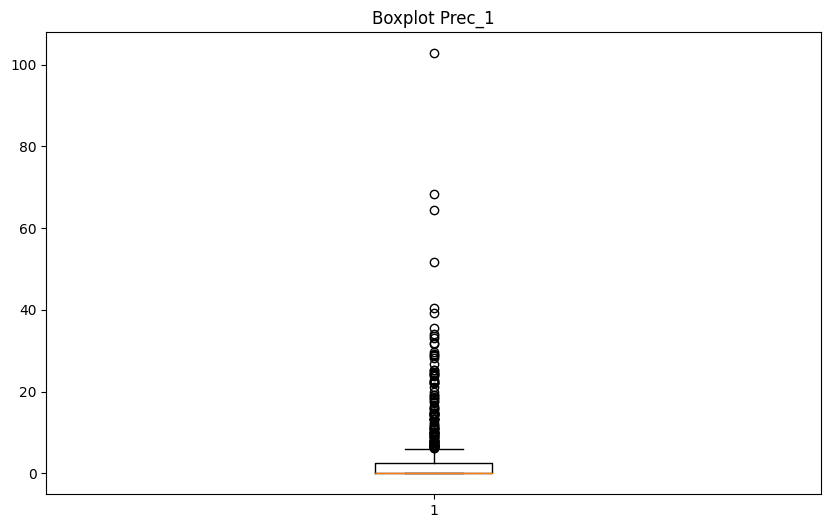

In [86]:
plt.figure(figsize=(10,6))
plt.boxplot(df["prec_1"])
plt.title("Boxplot Prec_1")
plt.show()

Es común que la mayor parte de los días no llueva, por ello el boxplot tiene la mayor parte de los datos alrededor de 0. Por la concentración de los outliers se tratan de datos que aportan mucha información al estudio y que se refiere a aquellos días que llueve más de lo normal.

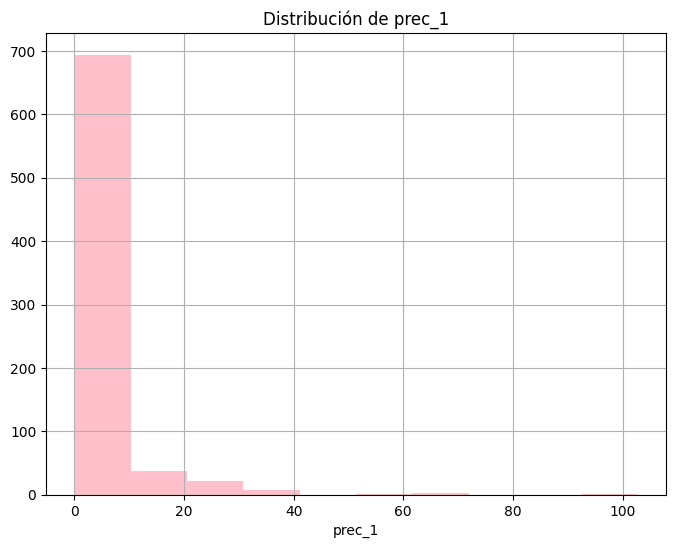

In [87]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]
df.prec_1.hist(color=['pink'])
plt.title('Distribución de prec_1')
plt.xlabel('prec_1')
plt.show()


Al observar el histograma de los valores de precipitaciones, los datos muestran un claro sesgo positivo.Del total de días, la mayoría llueve entre cero y 10 l/m2, lo que es lógico ya que habrá muchos días que no llueva o llueva muy poco. Por otra parte ha llegado a llover hasta 100 l/m2, algo muy poco común.

Ahora vamos a estudiar la velocidad media del viento:

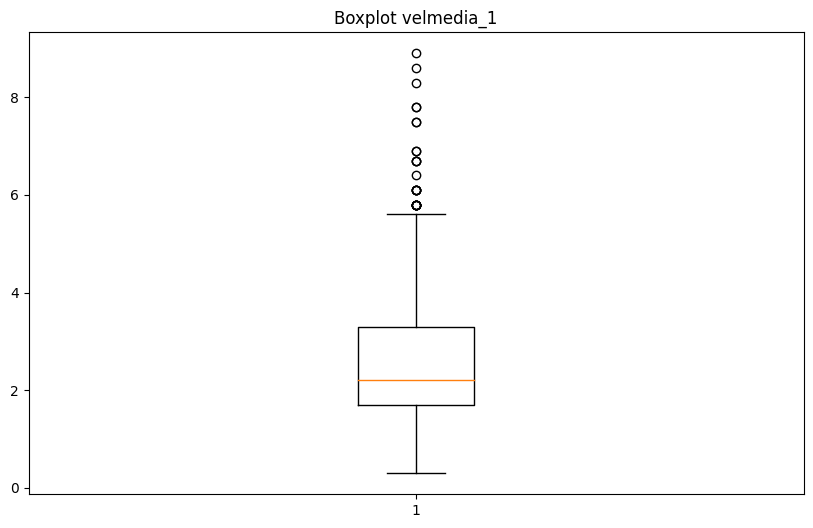

In [88]:
plt.figure(figsize=(10,6))
plt.boxplot(df["velmedia_1"])
plt.title("Boxplot velmedia_1")
plt.show()

No hay datos extremadamente lejanos. Nos hace pensar que es información real y que aumenta la riqueza del estudio. No los eliminamos tampoco.

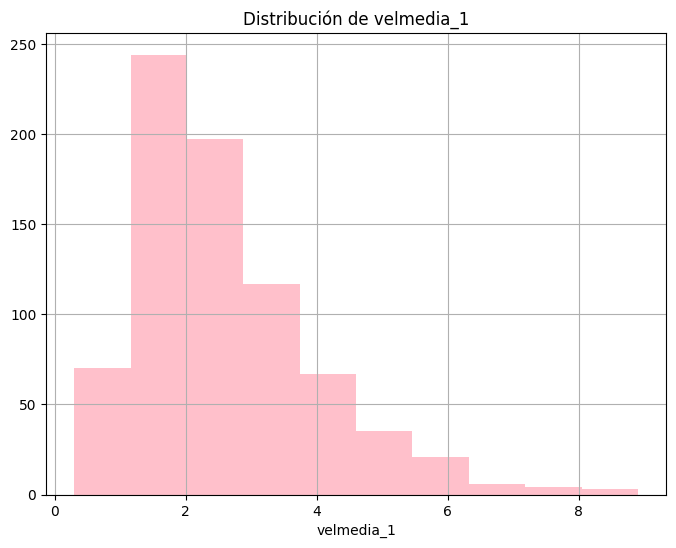

In [89]:
df.velmedia_1.hist(color=['pink'])
plt.title('Distribución de velmedia_1')
plt.xlabel('velmedia_1')
plt.show()

Observamos un ligero sesgo positivo.Son más comunes los días con poca velocidad de viento.

# 2. MODELO DE REGRESIÓN LINEAL.

## 2.1. SELECCIÓN DE LAS VARIABLES

Tratamos de construir un modelo lineal:
Y=B0+B1X1+...+BnXn+E
* Y es la variable dependiente o variable de respuesta.
* X1,...,Xn son las variables explicativas, independientes o regresoras.
* B0 es nuestra constante.
* B1,...,Bn son los parámetros del modelo, miden la influencia que las variables explicativas tienen sobre la variable respuesta.
* E representa el error cometido


Evaluamos la colinealidad entre nuestra variable dependiente, que por ahora será la temperatura media, y las demás variables independientes mediante el coeficiente de correlación de Pearson para ver qué variables utilizaremos para la predicción.

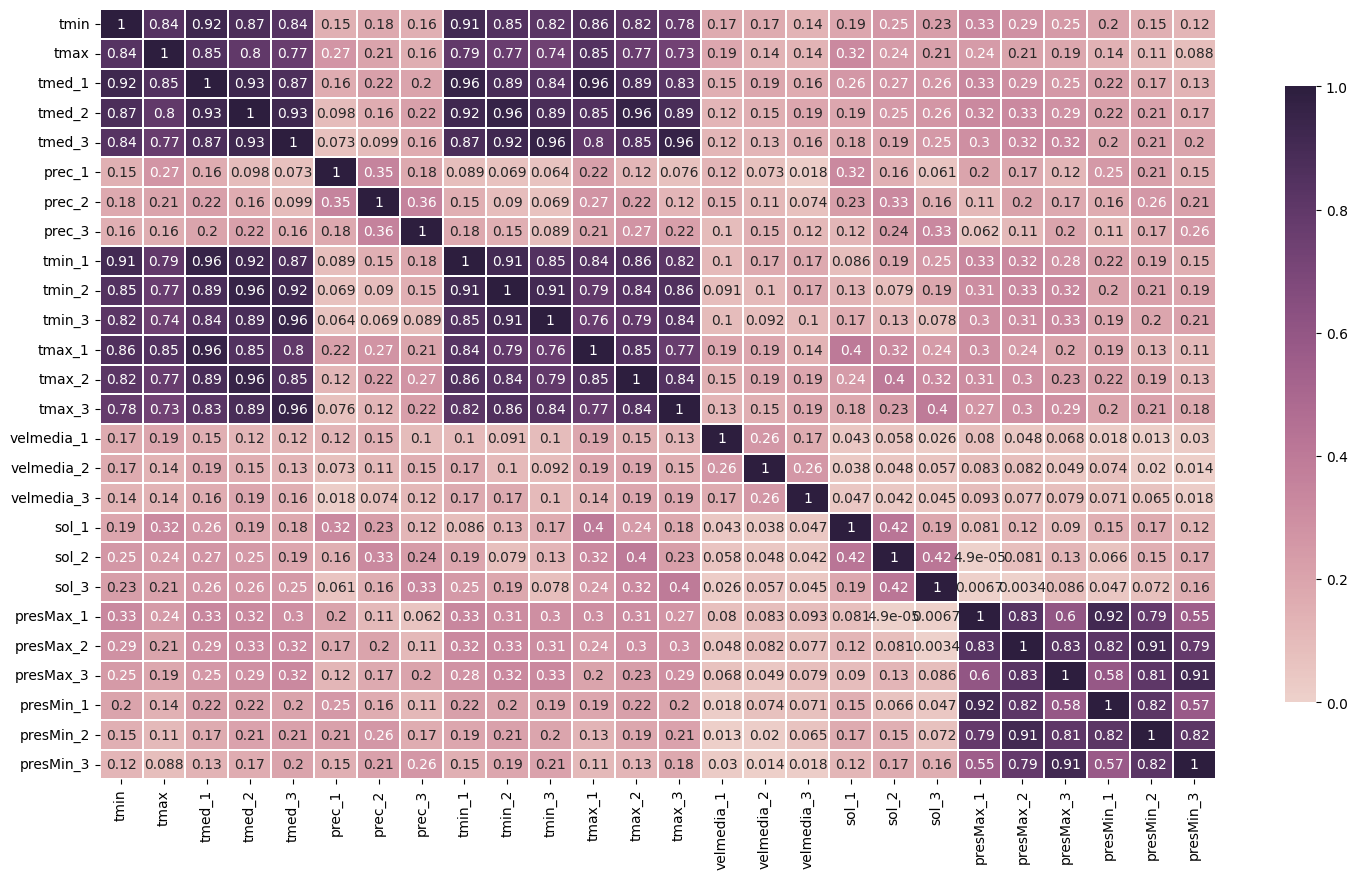

In [90]:
import seaborn as sns
import numpy as np
corr = np.abs(df.drop(['tmed'], axis=1).corr())

f, ax = plt.subplots(figsize=(18, 10))

sns.heatmap(corr,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap=sns.cubehelix_palette(as_cmap=True),annot=True, cbar_kws={"shrink": .8})
plt.show()


In [91]:
df.corr()[['tmed']].sort_values('tmed') 

,tmed
presMax_1,-0.299442
presMax_2,-0.258228
presMax_3,-0.226129
prec_1,-0.218606
prec_2,-0.199750
velmedia_1,-0.187708
presMin_1,-0.180101
prec_3,-0.164786
velmedia_2,-0.160291
velmedia_3,-0.142237


Para seleccionar las variables que vamos incluir en nuestro modelo de regresión, eliminaremos las que tengan valores de correlación inferior al valor absoluto de 0,6. Además, dado que las variables "tmin" y "tmax" son para el mismo día que la variable de predicción "tmed" es obvia esta alta correlación , así que también las eliminaremos.


Creo un nuevo DataFrame con mis variables de interés.

In [92]:
predictors = ['tmed_1',  'tmed_2',  'tmed_3', 
              'tmin_1',   'tmin_2',   'tmin_3',
              'tmax_1',   'tmax_2',  'tmax_3']
df2 = df[['tmed'] + predictors]

Vamos a graficar cada uno de estos predictores seleccionados para asegurarnos de que existe una relación lineal.

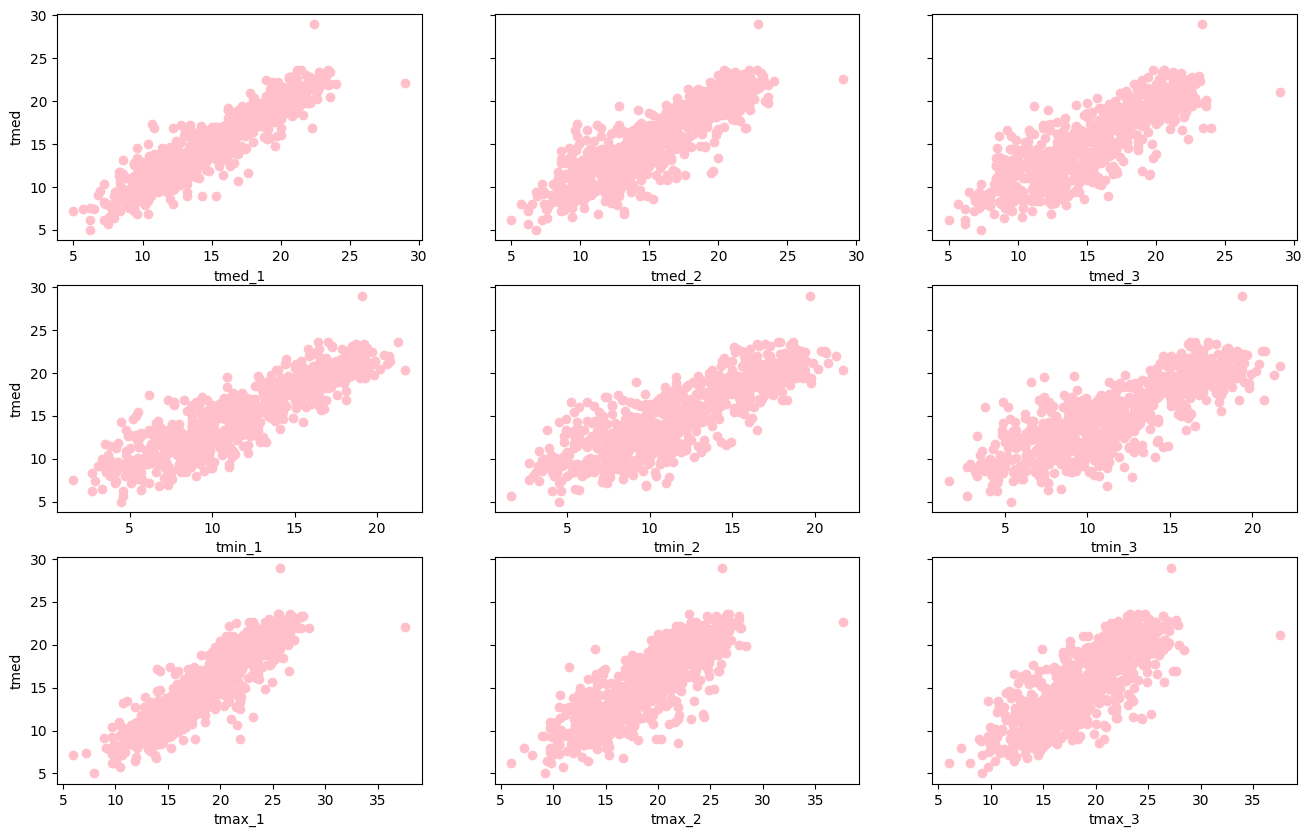

In [93]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16, 10]

fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True)

arr = np.array(predictors).reshape(3, 3)

for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['tmed'], color='pink')
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='tmed')
        else:
            axes[row, col].set(xlabel=feature)

Podemos observar que todas las variables predictoras muestran una buena relación lineal con la variable de respuesta ("tmed"). Además, también vale la pena señalar que todas las relaciones se ven uniformemente distribuidas, suposición importante para el modelo de regresión lineal. 

## 2.2. CONSTRUCCIÓN DEL MODELO: STEP-WISE 

Lo usual es realizar pruebas de hipótesis para verificar si los Bj son significativamente distintos de 0.(Si el p-valor > 0.05 se acepta hipótesis nula H0:Bj=0).

En muchos conjuntos de datos pueden ocurrir interacciones entre variables que pueden conducir a interpretaciones falsas de estas simples pruebas de hipótesis. Para probar los efectos de las interacciones de cualquier variable en un modelo de regresión lineal, a menudo se aplica una técnica conocida como regresión paso a paso. Con la regresión paso a paso, se agrega o elimina variables del modelo y evalúa la importancia estadística de cada variable en el modelo resultante. Los pasos son los siguientes:


1. Seleccionar un nivel de significación alpha para el contraste de hipótesis.
2. Ajustar el modelo con todas las variables predictoras.
3. Evaluar los p-valores de los coeficientes y, para el que tenga el mayor valor p, si p > alpha, avanzar al paso 4, si no, tenemos el modelo final.
4. Eliminar el predictor identificado en el paso 3.
5. Volver a ajustar el modelo y volver al paso 3.

In [94]:
import statsmodels.api as sm
X = df2[predictors]
y = df2['tmed']
#Añadimos una constante
X = sm.add_constant(X)
X


,const,tmed_1,tmed_2,tmed_3,tmin_1,tmin_2,tmin_3,tmax_1,tmax_2,tmax_3
fecha,,,,,,,,,,
2021-01-04,1.0,6.2,6.8,7.3,4.5,4.5,5.4,8.0,9.2,9.2
2021-01-05,1.0,5.0,6.2,6.8,4.1,4.5,4.5,6.0,8.0,9.2
2021-01-06,1.0,7.2,5.0,6.2,4.6,4.1,4.5,9.8,6.0,8.0
2021-01-07,1.0,6.2,7.2,5.0,2.7,4.6,4.1,9.7,9.8,6.0
2021-01-08,1.0,6.2,6.2,7.2,1.6,2.7,4.6,10.9,9.7,9.8
...,...,...,...,...,...,...,...,...,...,...
2023-02-25,1.0,9.1,6.8,10.4,6.1,4.6,6.8,12.1,8.9,13.9
2023-02-26,1.0,9.4,9.1,6.8,7.4,6.1,4.6,11.3,12.1,8.9
2023-02-27,1.0,9.0,9.4,9.1,7.6,7.4,6.1,10.4,11.3,12.1


In [95]:
alpha = 0.05

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tmed   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     531.2
Date:                Fri, 05 May 2023   Prob (F-statistic):          2.27e-319
Time:                        15:20:32   Log-Likelihood:                -1427.7
No. Observations:                 764   AIC:                             2875.
Df Residuals:                     754   BIC:                             2922.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0190      0.315      3.234      0.001       0.400       1.637
tmed_1         2.6126      1.684      1.551      0.121      -0.693       5.918
tmed_2        -1.1658      1.674     -0.696      0.486      -4.453       2.121
tmed_3         1.7562      1.681      1.044      0.297      -1.545       5.057
tmin_1        -0.9498      0.843     -1.127      0.260      -2.604       0.704
tmin_2         0.6110      0.836      0.731      0.465      -1.031       2.253
tmin_3        -0.7692      0.840     -0.916      0.360      -2.417       0.879
tmax_1        -0.8640      0.843     -1.025      0.306      -2.519       0.791
tmax_2         0.5743      0.838      0.686      0.493      -1.070       2.219
tmax_3        -0.8629      0.841     -1.026      0.305      -2.514       0.788
==============================================================================
Omnibus:                       33.695   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.461
Skew:                          -0.072   Prob(JB):                     1.13e-21
Kurtosis:                       4.735   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Aplicando el método step-wise, eliminamos la variable con el p-valor más alto, es decir, tmax_2.




In [96]:
import pandas as pd
X = X.drop('tmax_2', axis=1) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tmed   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     598.0
Date:                Fri, 05 May 2023   Prob (F-statistic):          1.13e-320
Time:                        15:20:32   Log-Likelihood:                -1428.0
No. Observations:                 764   AIC:                             2874.
Df Residuals:                     755   BIC:                             2916.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0227      0.315      3.248      0.001       0.405       1.641
tmed_1         2.6024      1.683      1.546      0.123      -0.702       5.907
tmed_2        -0.0186      0.062     -0.302      0.763      -0.140       0.102
tmed_3         1.7570      1.681      1.045      0.296      -1.543       5.057
tmin_1        -0.9460      0.842     -1.123      0.262      -2.599       0.707
tmin_2         0.0388      0.053      0.730      0.465      -0.065       0.143
tmin_3        -0.7701      0.839     -0.918      0.359      -2.418       0.877
tmax_1        -0.8591      0.843     -1.019      0.308      -2.513       0.795
tmax_3        -0.8625      0.841     -1.026      0.305      -2.513       0.788
==============================================================================
Omnibus:                       33.413   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.923
Skew:                          -0.074   Prob(JB):                     2.44e-21
Kurtosis:                       4.721   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Repetimos el proceso y esta vez eliminamos la variable tmed_2:

In [97]:
X = X.drop('tmed_2', axis=1)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tmed   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     684.2
Date:                Fri, 05 May 2023   Prob (F-statistic):          4.40e-322
Time:                        15:20:32   Log-Likelihood:                -1428.0
No. Observations:                 764   AIC:                             2872.
Df Residuals:                     756   BIC:                             2909.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0003      0.306      3.271      0.001       0.400       1.601
tmed_1         2.6171      1.682      1.556      0.120      -0.684       5.918
tmed_3         1.7410      1.679      1.037      0.300      -1.555       5.037
tmin_1        -0.9559      0.841     -1.136      0.256      -2.607       0.695
tmin_2         0.0286      0.041      0.697      0.486      -0.052       0.109
tmin_3        -0.7615      0.838     -0.908      0.364      -2.407       0.884
tmax_1        -0.8695      0.842     -1.033      0.302      -2.522       0.782
tmax_3        -0.8576      0.840     -1.021      0.308      -2.507       0.791
==============================================================================
Omnibus:                       33.433   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.061
Skew:                          -0.073   Prob(JB):                     2.28e-21
Kurtosis:                       4.722   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Eliminamos t_min2:

In [98]:
X = X.drop('tmin_2', axis=1)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tmed   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     798.7
Date:                Fri, 05 May 2023   Prob (F-statistic):          1.98e-323
Time:                        15:20:32   Log-Likelihood:                -1428.3
No. Observations:                 764   AIC:                             2871.
Df Residuals:                     757   BIC:                             2903.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9721      0.303      3.208      0.001       0.377       1.567
tmed_1         2.6239      1.681      1.561      0.119      -0.676       5.924
tmed_3         1.8099      1.676      1.080      0.280      -1.479       5.099
tmin_1        -0.9469      0.841     -1.126      0.260      -2.597       0.704
tmin_3        -0.7844      0.837     -0.937      0.349      -2.428       0.859
tmax_1        -0.8734      0.841     -1.038      0.299      -2.525       0.778
tmax_3        -0.8871      0.839     -1.058      0.290      -2.533       0.759
==============================================================================
Omnibus:                       33.601   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.698
Skew:                          -0.076   Prob(JB):                     1.66e-21
Kurtosis:                       4.727   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Eliminamos tmin_3:

In [99]:
X = X.drop('tmin_3', axis=1)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tmed   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     958.4
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        15:20:32   Log-Likelihood:                -1428.7
No. Observations:                 764   AIC:                             2869.
Df Residuals:                     758   BIC:                             2897.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9662      0.303      3.189      0.001       0.371       1.561
tmed_1         2.7033      1.679      1.610      0.108      -0.592       5.999
tmed_3         0.2412      0.055      4.354      0.000       0.132       0.350
tmin_1        -0.9861      0.840     -1.174      0.241      -2.634       0.662
tmax_1        -0.9132      0.840     -1.087      0.277      -2.562       0.736
tmax_3        -0.1027      0.045     -2.269      0.024      -0.192      -0.014
==============================================================================
Omnibus:                       33.962   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.452
Skew:                          -0.076   Prob(JB):                     6.89e-22
Kurtosis:                       4.743   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Eliminamos tmax_1:

In [100]:
X = X.drop('tmax_1', axis=1)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tmed   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1197.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        15:20:32   Log-Likelihood:                -1429.3
No. Observations:                 764   AIC:                             2869.
Df Residuals:                     759   BIC:                             2892.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9597      0.303      3.168      0.002       0.365       1.554
tmed_1         0.8790      0.048     18.186      0.000       0.784       0.974
tmed_3         0.2426      0.055      4.378      0.000       0.134       0.351
tmin_1        -0.0747      0.047     -1.589      0.112      -0.167       0.018
tmax_3        -0.1041      0.045     -2.300      0.022      -0.193      -0.015
==============================================================================
Omnibus:                       34.024   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.031
Skew:                          -0.073   Prob(JB):                     5.16e-22
Kurtosis:                       4.749   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Eliminamos tmin_1:

In [101]:
X = X.drop('tmin_1', axis=1)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tmed   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1593.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        15:20:32   Log-Likelihood:                -1430.6
No. Observations:                 764   AIC:                             2869.
Df Residuals:                     760   BIC:                             2888.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1975      0.264      4.542      0.000       0.680       1.715
tmed_1         0.8156      0.027     29.839      0.000       0.762       0.869
tmed_3         0.2230      0.054      4.124      0.000       0.117       0.329
tmax_3        -0.0967      0.045     -2.146      0.032      -0.185      -0.008
==============================================================================
Omnibus:                       30.843   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.842
Skew:                          -0.029   Prob(JB):                     3.77e-19
Kurtosis:                       4.631   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ahora todos los p-valores son menores a 0.05 por lo que hemos terminado, tenemos nuestras variables.

In [102]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tmed   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1593.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        15:20:32   Log-Likelihood:                -1430.6
No. Observations:                 764   AIC:                             2869.
Df Residuals:                     760   BIC:                             2888.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1975      0.264      4.542      0.000       0.680       1.715
tmed_1         0.8156      0.027     29.839      0.000       0.762       0.869
tmed_3         0.2230      0.054      4.124      0.000       0.117       0.329
tmax_3        -0.0967      0.045     -2.146      0.032      -0.185      -0.008
==============================================================================
Omnibus:                       30.843   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.842
Skew:                          -0.029   Prob(JB):                     3.77e-19
Kurtosis:                       4.631   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
print("El porcentaje de variabilidad explicada es: %.2f" % model.rsquared)

El porcentaje de variabilidad explicada es: 0.86


R-cuadrado y Adj.R-cuadrado son altos, por tanto, estamos ante un buen modelo pues gran parte de la variación de la variable respuesta está explicada por las variables predictoras.

## 2.3. SCIKIT-LEARN.


Medimos la capacidad predictora del modelo. Comenzaremos usando SciKit-Learn para dividir nuestro conjunto de datos en conjuntos de prueba y entrenamiento importando la función train_test_split() del módulo sklearn.model_selection. Utilizamos un 80 % de entrenamiento y un 20 % de prueba, y asignaremos un estado aleatorio de 12. 

In [104]:
from sklearn.model_selection import train_test_split
X = X.drop('const', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

Para ver la forma que tienen estos conjuntos de datos:

In [105]:
X_test.head()

,tmed_1,tmed_3,tmax_3
fecha,,,
2021-03-12,13.4,9.2,12.3
2021-11-17,13.0,14.3,16.9
2021-04-16,11.5,9.8,13.9
2022-06-14,20.6,19.5,21.8
2022-11-02,15.6,16.9,20.5


In [106]:
y_test.head()

fecha
2021-03-12    12.0
2021-11-17    12.4
2021-04-16    11.5
2022-06-14    20.4
2022-11-02    14.7
Name: tmed, dtype: float64

In [107]:
X_train.head()

,tmed_1,tmed_3,tmax_3
fecha,,,
2021-10-10,16.5,17.0,22.6
2022-07-23,19.4,21.1,22.9
2021-07-02,18.8,17.4,19.2
2021-03-15,12.2,12.0,15.4
2021-11-06,10.4,11.4,13.3


Lo siguiente que vamos a hacer es construir el modelo de regresión utilizando el conjunto de datos de entrenamiento. 

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

regressor = LinearRegression()

mod =regressor.fit(X_train, y_train)

prediction = regressor.predict(X_test)
varexp=mod.score(X_test, y_test)
regmse=mean_squared_error(y_test, prediction)

from sklearn.metrics import mean_absolute_error, median_absolute_error
print("El porcentaje de variabilidad explicada es: %.2f" % varexp)
print("El MSE es: %.2f grados" % regmse)
print("El MAE es: %.2f grados" % mean_absolute_error(y_test, prediction))
print("El MAD es: %.2f grados" % median_absolute_error(y_test, prediction))
print("El RMSE es: %.2f grados" % mean_squared_error(y_test, prediction, squared=False))

El porcentaje de variabilidad explicada es: 0.87
El MSE es: 2.40 grados
El MAE es: 1.14 grados
El MAD es: 0.87 grados
El RMSE es: 1.55 grados


In [109]:
comparacion=pd.DataFrame(prediction,y_test)
comparacion.head()

,0
tmed,
12.0,13.144942
12.4,13.267299
11.5,11.494577
20.4,20.268589
14.7,15.658958


Interpretamos la validez del modelo. Usamos la función score() para determinar que el modelo puede explicar alrededor del **87%** de la variabiliadad explicada en la variable objetivo (temperatura media). 


Además, utilizamos mean_absolute_error() y mediana_absolute_error() del módulo sklearn.metrics para determinar que, en promedio, el valor predictivo tiene una desviación de aproximadamente **1.14 grados** centígrado y la mediana de desviación es de **0.87 grados** centígrado.

Mediante el DataFrame de 'comparacion' vemos los valores que nos da la predicción (derecha) comparados con los reales (izquierda). Observamos que son muy cercanos.



# 3. REDES NEURONALES

A pesar de ser efectiva la predicción con el modelo de regresión lineal, debido a los supuestos de la relación lineal entre Y y las variables independientes, construiremos otro modelo de predicción para evitar posibles problemas con dicha suposición.
Las redes neuronales son una técnica de aprendizaje automático que trabaja tanto con operaciones lineales como con no lineales. En general , consisten en una capa de entrada (los nodos de entrada procesan los datos, los analizan o los clasifican y los pasan a la siguiente capa) , capas ocultas (toman su entrada de la capa de entrada o de otras capas ocultas y analiza la salida de la capa anterior, la procesa aún más y la pasa a la siguiente capa) y por último , la capa de salida que proporciona el resultado final.

## 3.1.TF.KERAS 

In [110]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error

Volvemos al DataFrame principal para construir nuestro nuevo modelo.

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tmed,764.0,15.127880,4.251216,5.0,11.800,14.80,18.800,29.0
tmin,764.0,11.781806,4.390831,1.6,8.400,11.35,15.700,21.7
tmax,764.0,18.474215,4.479071,6.0,15.100,18.25,21.900,37.6
tmed_1,764.0,15.132592,4.255050,5.0,11.800,14.80,18.800,29.0
tmed_2,764.0,15.140969,4.253794,5.0,11.800,14.80,18.800,29.0
tmed_3,764.0,15.142016,4.252462,5.0,11.800,14.80,18.800,29.0
prec_1,764.0,3.154256,8.083154,0.0,0.000,0.00,2.400,102.8
prec_2,764.0,3.144566,8.061106,0.0,0.000,0.00,2.400,102.8
prec_3,764.0,3.146690,8.056293,0.0,0.000,0.00,2.600,102.8
tmin_1,764.0,11.791623,4.398574,1.6,8.400,11.40,15.700,21.7


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 2021-01-04 to 2023-03-01
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tmed        764 non-null    float64
 1   tmin        764 non-null    float64
 2   tmax        764 non-null    float64
 3   tmed_1      764 non-null    float64
 4   tmed_2      764 non-null    float64
 5   tmed_3      764 non-null    float64
 6   prec_1      764 non-null    float64
 7   prec_2      764 non-null    float64
 8   prec_3      764 non-null    float64
 9   tmin_1      764 non-null    float64
 10  tmin_2      764 non-null    float64
 11  tmin_3      764 non-null    float64
 12  tmax_1      764 non-null    float64
 13  tmax_2      764 non-null    float64
 14  tmax_3      764 non-null    float64
 15  velmedia_1  764 non-null    float64
 16  velmedia_2  764 non-null    float64
 17  velmedia_3  764 non-null    float64
 18  sol_1       764 non-null    float64
 19  sol_2       764 no

Nos aseguramos que no hay datos nulos. 

Eliminamos las columnas "tmin" y "tmax" ya que no tienen ningún significado para predecir las temperaturas medias . Estamos tratando de predecir el futuro por lo que obviamente no podemos tener datos sobre el futuro.

Separamos la variable respuesta Y ( en nuestro caso, tmed) de las variables independientes X

In [113]:
df = df.drop(['tmin', 'tmax'], axis=1)
X = df[[col for col in df.columns if col != 'tmed']]
y = df['tmed']

Dividimos nuestro conjunto de datos en conjuntos de entrenamiento y prueba. Sin embargo, para explicar mejor el proceso iterativo de entrenamiento de la red neuronal, usaremos un conjunto de datos adicional al que llamaremos "conjunto de validación". Para el conjunto de entrenamiento, utilizamos el 80 % de los datos y para el conjunto de prueba y validación, cada uno será el 10 % de los datos restantes.

Para dividir estos datos, volvemos a utilizar train_test_split(...) de Sci-Kit Learn.

In [114]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [115]:
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Datos de entrenamiento   {}, Variables de entrenamiento   {}".format(X_train.shape[0], X_train.shape[1]))
print("Datos de validación {}, Variables de validación {}".format(X_val.shape[0], X_val.shape[1]))
print("Datos de prueba    {}, Variables de prueba    {}".format(X_test.shape[0], X_test.shape[1]))

Datos de entrenamiento   611, Variables de entrenamiento   24
Datos de validación 77, Variables de validación 24
Datos de prueba    76, Variables de prueba    24


In [116]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam())

history = model.fit(X_train, y_train,
                    epochs=210,
                    batch_size=300,
                    validation_data=(X_val, y_val))



Epoch 1/210
3/3 [==============================] - 2s 165ms/step - loss: 2409.9773 - val_loss: 1655.5780
Epoch 2/210
3/3 [==============================] - 0s 53ms/step - loss: 1008.6526 - val_loss: 294.9433
Epoch 3/210
3/3 [==============================] - 0s 41ms/step - loss: 586.1567 - val_loss: 197.3535
Epoch 4/210
3/3 [==============================] - 0s 45ms/step - loss: 120.1895 - val_loss: 272.4444
Epoch 5/210
3/3 [==============================] - 0s 44ms/step - loss: 260.2230 - val_loss: 53.7018
Epoch 6/210
3/3 [==============================] - 0s 28ms/step - loss: 34.1282 - val_loss: 126.7091
Epoch 7/210
3/3 [==============================] - 0s 39ms/step - loss: 138.0014 - val_loss: 22.0369
Epoch 8/210
3/3 [==============================] - 0s 54ms/step - loss: 25.5563 - val_loss: 97.7891
Epoch 9/210
3/3 [==============================] - 0s 44ms/step - loss: 82.7664 - val_loss: 24.4555
Epoch 10/210
3/3 [==============================] - 0s 26ms/step - loss: 21.3084 - va

El siguiente código generará un gráfico de dispersión que muestra el error de entrenamiento y el error de validación para cada epoch. El eje x muestra el número de epoch, mientras que el eje y muestra el error de entrenamiento y el error de validación, respectivamente.

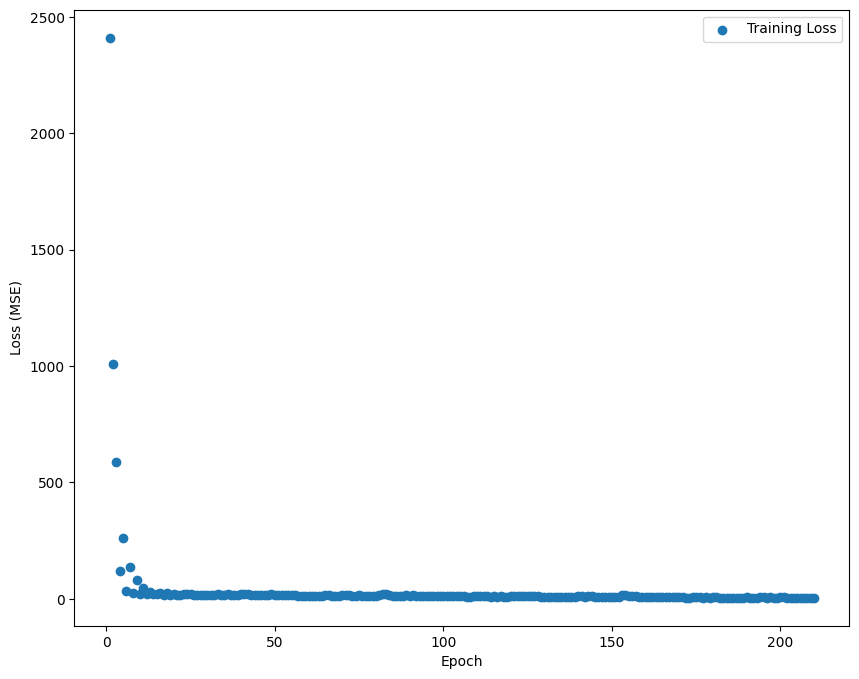

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 8]

training_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.scatter(x=range(1, len(training_loss)+1), y=training_loss, label='Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


Este gráfico nos confirma que después de todas las iteraciones no hemos sobreajustado el modelo porque las pérdidas de evaluación nunca muestran un cambio significativo en la dirección hacia un valor creciente. Ahora podemos pasar a hacer predicciones basadas en el conjunto de datos de prueba restante y evaluar cómo el modelo predice las temperaturas climáticas medias.


In [118]:
from sklearn.metrics import r2_score
y_pred1 = model.predict(X_test)
r2 = r2_score(y_test, y_pred1)
mse = model.evaluate(X_test, y_test)

print("La variabilidad explicada es: {:.2f}".format(r2))
print("El MSE es: {:.4f} grados".format(mse))

3/3 [==============================] - 0s 6ms/step - loss: 4.3717
La variabilidad explicada es: 0.75
El MSE es: 4.3717 grados


# 4. MÁS MODELOS USANDO SKLEARN 

Para este modelo tenemos una variabilidad explicada de alrededor de un 80%

## 4.1 ÁRBOL DE DECISIÓN

Ahora utilizaremos los árboles de decisión para crear otro modelo predictivo  y evaluarlo.

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeRegressor(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 15)},
             scoring='neg_mean_squared_error')

In [120]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train, y_train)

y_pred_train = treeModel.predict(X_train)
y_pred_test = treeModel.predict(X_test)

print("El porcentaje de variabilidad explicada es: %.2f" % treeModel.score(X_test, y_test))
print("El MSE es: %.2f GRADOS" % mean_squared_error(y_test, y_pred_test))
print("El MAE es: %.2f GRADOS" % mean_absolute_error(y_test, y_pred_test))
print("El MAD es: %.2f GRADOS" % median_absolute_error(y_test, y_pred_test))
print("El RMSE es: %.2f GRADOS" % mean_squared_error(y_test, y_pred_test, squared=False))

El porcentaje de variabilidad explicada es: 0.71
El MSE es: 5.03 GRADOS
El MAE es: 1.62 GRADOS
El MAD es: 1.26 GRADOS
El RMSE es: 2.24 GRADOS


## 4.2 RANDOM FOREST

En este caso utilizaremos el RandomForest.

In [127]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_3 = rf.predict(X_test)
print("El porcentaje de variabilidad explicada es: %.2f" % rf.score(X_test, y_test))
print("El MSE es: %.2f grados" % mean_squared_error(y_test, y_pred_3))
print("El MAE es: %.2f grados" % mean_absolute_error(y_test, y_pred_3))
print("El MAD es: %.2f grados" % median_absolute_error(y_test, y_pred_3))
print("El RMSE es: %.2f grados" % mean_squared_error(y_test, y_pred_3, squared=False))

El porcentaje de variabilidad explicada es: 0.82
El MSE es: 3.15 grados
El MAE es: 1.32 grados
El MAD es: 0.91 grados
El RMSE es: 1.77 grados


## 4.3 BAGGING

Ahora utilizaremos el modelo Bagging.

In [134]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10)
bag.fit(X_train, y_train)
y_pred_6 = bag.predict(X_test)
print("El porcentaje de variabilidad explicada es: %.2f" % bag.score(X_test, y_test))
print("El MSE es: %.2f grados" % mean_squared_error(y_test, y_pred_6))
print("El MAE es: %.2f grados" % mean_absolute_error(y_test, y_pred_6))
print("El MAD es: %.2f grados" % median_absolute_error(y_test, y_pred_6))
print("El RMSE es: %.2f grados" % mean_squared_error(y_test, y_pred_6, squared=False))

El porcentaje de variabilidad explicada es: 0.85
El MSE es: 2.56 grados
El MAE es: 1.22 grados
El MAD es: 1.00 grados
El RMSE es: 1.60 grados


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## 4.4 KNN

En este caso utilizaremos el modelo de los k vecinos más cercanos.

In [123]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_7 = knn.predict(X_test)
print("El porcentaje de variabilidad explicada es: %.2f" % knn.score(X_test, y_test))
print("El MSE es: %.2f grados" % mean_squared_error(y_test, y_pred_7))
print("El MAE es: %.2f grados" % mean_absolute_error(y_test, y_pred_7))
print("El MAD es: %.2f grados" % median_absolute_error(y_test, y_pred_7))
print("El RMSE es: %.2f grados" % mean_squared_error(y_test, y_pred_7, squared=False))

El porcentaje de variabilidad explicada es: 0.72
El MSE es: 4.90 grados
El MAE es: 1.71 grados
El MAD es: 1.41 grados
El RMSE es: 2.21 grados


## 4.5 Gradient Boost

Finalmente utilizaremos el Gradient Boost.

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_4 = gb.predict(X_test)
print("El porcentaje de variabilidad explicada es: %.2f" % gb.score(X_test, y_test))
print("El MSE es: %.2f" % mean_squared_error(y_test, y_pred_4))
print("El MAE es: %.2f" % mean_absolute_error(y_test, y_pred_4))
print("El MAD es: %.2f" % median_absolute_error(y_test, y_pred_4))
print("El RMSE es: %.2f" % mean_squared_error(y_test, y_pred_4, squared=False))

NameError: name 'X_train' is not defined

# 5. COMPARACIONES


## 5.1 COMPARACIÓN BASADA EN LA VARIABILIDAD EXPLICADA


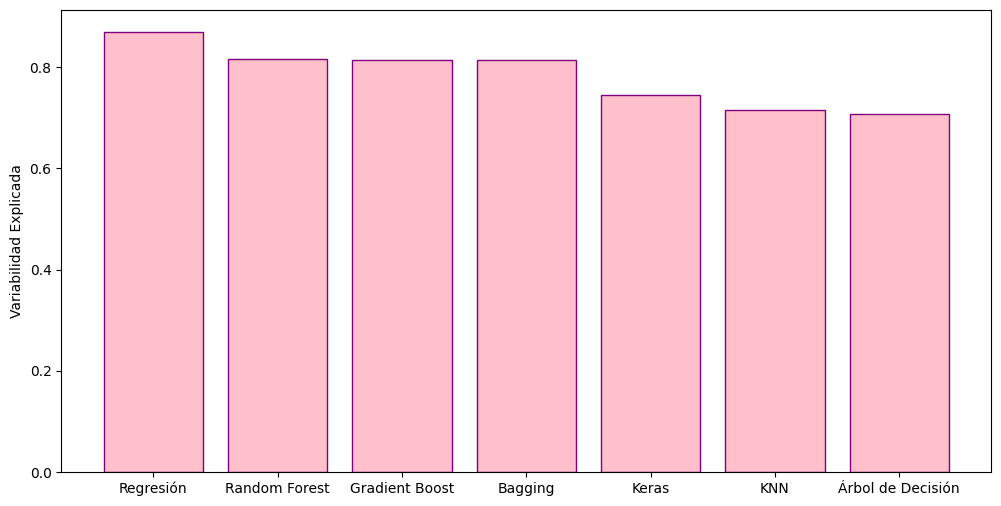

In [125]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

V_values = []
V_values.append(varexp)
V_values.append(r2)
V_values.append(treeModel.score(X_test, y_test))
V_values.append(rf.score(X_test, y_test))
V_values.append(bag.score(X_test, y_test))
V_values.append(knn.score(X_test, y_test))
V_values.append(gb.score(X_test, y_test))

model_names = ['Regresión', 'Keras', 'Árbol de Decisión', 'Random Forest','Bagging', 'KNN', 'Gradient Boost']

sorted_idx = np.argsort(V_values)[::-1]
sorted_model_names = [model_names[i] for i in sorted_idx]
sorted_V_values = [V_values[i] for i in sorted_idx]

plt.figure(figsize=(12,6))
plt.bar(sorted_model_names, sorted_V_values, color='pink', edgecolor='purple')
plt.ylabel('Variabilidad Explicada')
plt.show()

En el gráfico vemos que claramente es el modelo de regresión lineal el que explica mayor variabilidad de los datos.

## 5.2 COMPARACIÓN BASADA EN EL MSE

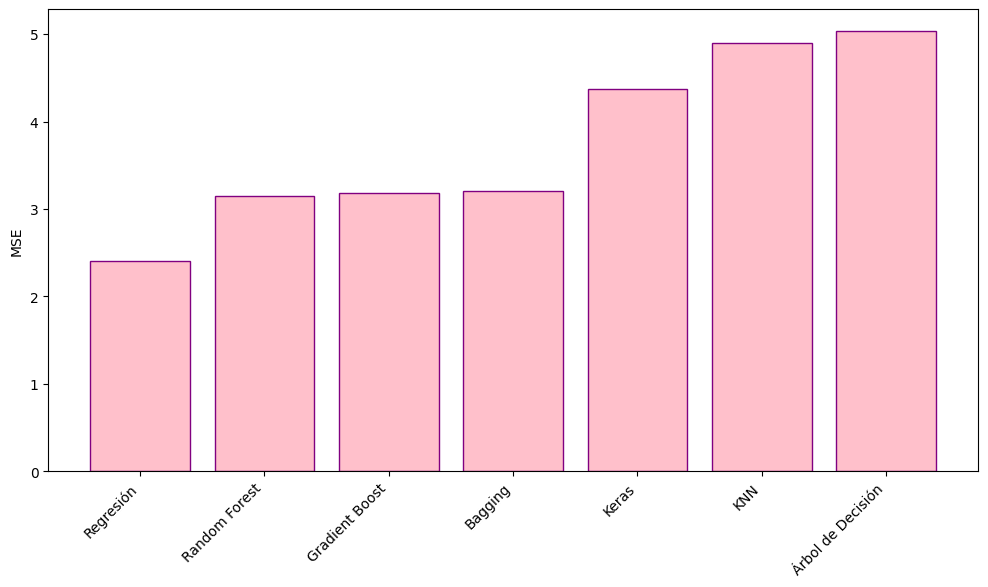

In [126]:
mse_values = []

mse_values.append(regmse)
mse_values.append(mse)
mse_values.append(mean_squared_error(y_test, y_pred_test))
mse_values.append(mean_squared_error(y_test, y_pred_3))
mse_values.append(mean_squared_error(y_test, y_pred_6))
mse_values.append(mean_squared_error(y_test, y_pred_7))
mse_values.append(mean_squared_error(y_test, y_pred_4))


model_names = [ 'Regresión','Keras', 'Árbol de Decisión', 'Random Forest','Bagging', 'KNN', 'Gradient Boost']

sorted_idx = np.argsort(mse_values)
sorted_model_names = [model_names[i] for i in sorted_idx]
sorted_mse_values = [mse_values[i] for i in sorted_idx]

plt.figure(figsize=(12,6))
plt.bar(sorted_model_names, sorted_mse_values, color='pink', edgecolor='purple')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.show()


# 5. RESUMEN Y CONCLUSIONES

Una vez extraídos y tratados los datos (valores missing, outliers) hemos probado dos técnicas de predicción para valores futuros:

**Regresión lineal**: hemos elegido las variables con correlación mayor a 0.6 y que tienen una clara relación lineal para crear nuestro modelo de regresión, quitando tmin y tmax porque no tiene sentido incluirlas.
>Utilizando la **regresión paso a paso** nos quedamos solo con 3 variables, que serán las que utilizaremos para entrenar y validar nuestro modelo.
Seleccionando un 80% de los datos para el entrenamiento y un 20% para la validación obtenemos que explica el 87% de la varianza y tiene un MSE de 2.40.

>

**Redes neuronales**: 
>Utilizando el estimador **TF.Keras** tenemos que explica el 75% de la variabilidad y tiene un error cuadrático medio (mse) de 4.37.

**Más modelos usando SKLEARN**

>Utilizando el estimador de los **árboles de decisión**  tenemos que explica el 71% de la variabilidad con un mse de 4.2.

>Utilizando el estimador de **RandomForest** tenemos que explica el 82% de la variabilidad con un mse de 3.15.

>Utilizando el estimador **Bagging** tenemos que explica el 85% de la variabiilidad con un mse de 2.56.

>Utilizando el estimador **kNN** tenemos que explica el 72% de la variabilidad con un mse de 4.90.

>Utilizando el estimador **GradientBoost** tenemos que explica el 81% de la variabilidad con un mse de 3.19.

En conclusión, tenemos varios modelos buenos, ya que regresión, RandomForest y GradientBoost explican más del 80% de la variabilidad. Sin embargo, nos quedamos con **regresión lineal**, ya que es tiene la que mayor variabilidad explicada y, además, tiene un menor mse, siendo el único que baja de 2.5.
Entre los modelos que utilizan SciKitLearn nos quedamos con **Bagging** ya que tiene un 85% de la variabilidad explicada y un MSE de 2.56. 